# Analysis of Corporate Lobbying

<p>
This notebook will contain analysis of the master_df scraped and updated <br>
from corporate_lobbying.ipynb and update_master.ipynb.
<br><br>
This will be a slow burn - my data goes back to Aug 5 2025 and the website which I am <br>
scraping from gets updated daily.
<br><br>
I want to gather data slowly and over time see how the amount of corporate lobbying affects <br>
the stock price of the companies conducting the lobbying.
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#read in master df

df = pd.read_csv(r'C:\Users\ronan\Projects\master_df.csv', parse_dates=['Date'], dayfirst=True)

Ticker
VRTX    1140000
ARDX     670000
NDAQ     650000
GNW      459296
TWLO     290000
RIVN     280000
MRBK     240000
JNJ      200000
UNM      190000
FOX      185000
Name: Amount, dtype: int64


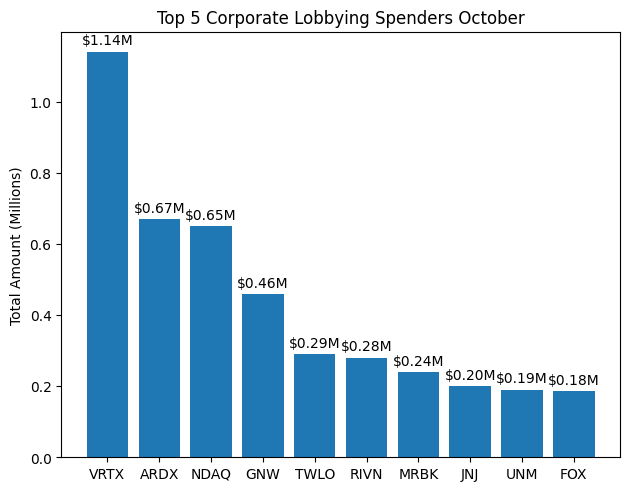

In [3]:
df_month = df[df['Date'] >= '2025-10-01' ] #get data for the month

totals_monthly = df_month.groupby('Ticker')['Amount'].sum().sort_values(ascending=False).head(10) #group by amount per ticker
print(totals_monthly) #see the top 10 amounts

# bar plot for monhtly lobbying amounts
fig, ax = plt.subplots()
bars = ax.bar(totals_monthly.index, totals_monthly.values / 1_000_000)
ax.set_ylabel("Total Amount (Millions)")

ax.bar_label(bars,
             labels=[f"${v/1_000_000:.2f}M" for v in totals_monthly.values],
             padding=3)
plt.tight_layout()
plt.title('Top 5 Corporate Lobbying Spenders October')
plt.show()


Ticker
ENTG    110000
VRSN     90000
VSAT     80000
GILD     80000
LLY      80000
DD       70000
CHPT     60000
NVO      60000
GMAB     60000
JNJ      60000
Name: Amount, dtype: int64


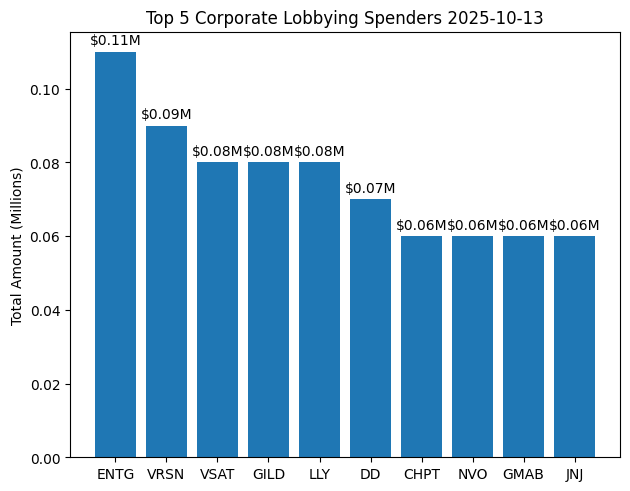

In [4]:
df_daily = df[df['Date'] >= '2025-10-12']

totals_daily = df_daily.groupby('Ticker')['Amount'].sum().sort_values(ascending=False).head(10) #group by amount per ticker
print(totals_daily)

# bar plot
fig, ax = plt.subplots()
bars = ax.bar(totals_daily.index, totals_daily.values / 1_000_000)
ax.set_ylabel(f"Total Amount (Millions)")

ax.bar_label(bars,
             labels=[f"${v/1_000_000:.2f}M" for v in totals_daily.values],
             padding=3)
plt.tight_layout()
plt.title(f'Top 5 Corporate Lobbying Spenders {dt.date.today()}')
plt.show()

In [5]:
df.groupby('Ticker')['Amount'].sum().sort_values(ascending=False).head(10)

Ticker
V       15960000
INTC     4850000
LMT      3984915
PFE      3740000
SO       2890000
ARDX     1950000
TAK      1620000
VRTX     1140000
CTVA      900000
FLR       875887
Name: Amount, dtype: int64

In [7]:
df[df['Ticker'] == 'VRSN']

,Ticker,Company Name,Amount,Date
16,VRSN,Verisign Inc.,90000,2025-10-12


<p>
Recently the ticker V (Visa) jumped head of INTC as the company who has lobbied the most since I started recording data <br>
I want to look more into this because they spent almost $16m on lobbying
</p>

In [9]:
df[df['Ticker'] == 'V']

,Ticker,Company Name,Amount,Date
88,V,Visa Inc.,1420000,2025-09-26
89,V,Visa Inc.,2030000,2025-09-26
90,V,Visa Inc.,1810000,2025-09-26
91,V,Visa Inc.,1800000,2025-09-26
92,V,Visa Inc.,2110000,2025-09-26
93,V,Visa Inc.,2310000,2025-09-26
94,V,Visa Inc.,2440000,2025-09-26
95,V,Visa Inc.,2040000,2025-09-26


<p>
Holy shit - they spent $16m dollars in one day on lobbying - lets see how their stock has since reacted to see if there has been a<br>
significant reaction
</p>

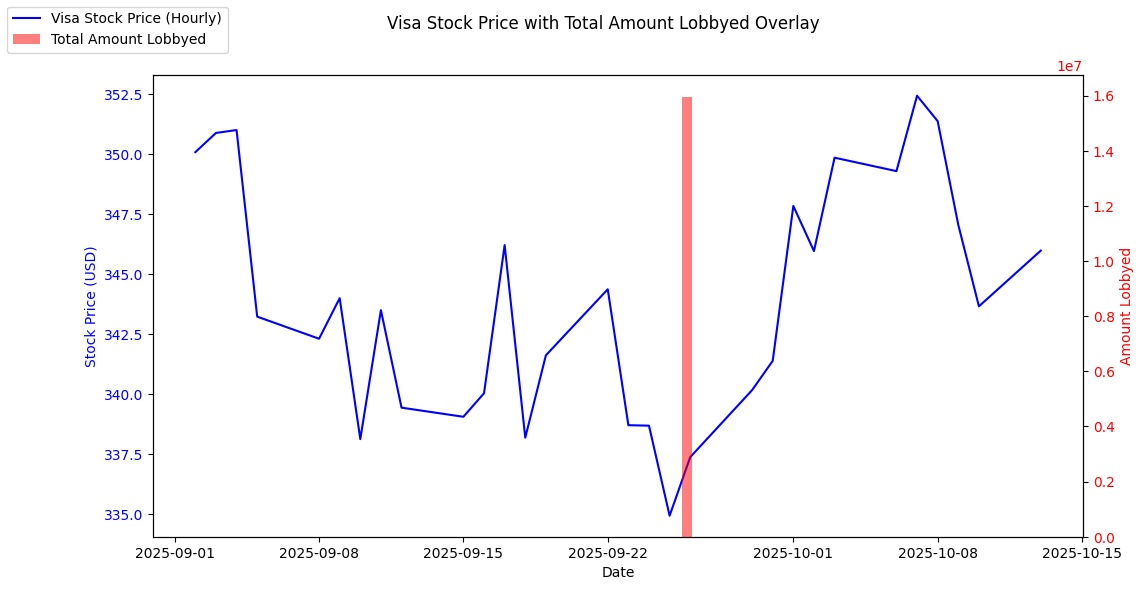

In [10]:
# Example stock data
ticker = yf.Ticker("V")
price_data = ticker.history(period="30d", interval="1d")

# --- Convert Date column to datetime ---
df['Date'] = pd.to_datetime(df['Date'])

# Filter Visa
visa_df = df[df['Ticker'] == 'V']

# Compute total Amount
total_amount = visa_df['Amount'].sum()

# Pick a date to position the bar (e.g., the last date in your stock data)
bar_date = pd.to_datetime("2025-09-26")

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Stock price
ax1.plot(price_data.index, price_data["Close"], label="Visa Stock Price (Hourly)", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Amount bar on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(bar_date, total_amount, width=0.5, color="red", alpha=0.5, label="Total Amount Lobbyed")
ax2.set_ylabel("Amount Lobbyed", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title and legends
fig.suptitle("Visa Stock Price with Total Amount Lobbyed Overlay")
fig.legend(loc="upper left")

plt.show()

In [ ]:
#function to group and sum lobbied amounts by date
#in dataset some Tickers have multiple rows for one day
#so if lobbying has same days then group them together and count as one

def sum_amounts_by_date(df, ticker):
    # Filter for the specific ticker
    ticker_df = df[df['Ticker'] == ticker].copy()

    # Make sure Date is in datetime format
    ticker_df['Date'] = pd.to_datetime(ticker_df['Date'])

    # Group by Date and sum the Amount column
    grouped = (
        ticker_df.groupby('Date', as_index=False)['Amount']
        .sum()
        .sort_values('Date')
    )

    return grouped

In [14]:
sum_amounts_by_date(df=df, ticker='RIVN')

,Date,Amount
0,2025-10-02,220000
1,2025-10-03,60000


<p>
So I have my dataset - it's slowly coming together. <br>
I want to see how stocks performed after lobbying was reported. <br>
</p>

In [ ]:
#first off I need to sum together stocks which have lobbying on the same day

df[df['Ticker'] == 'V']

#for VISA - it had 16m in one day but its down as 8 different transactions
#so for cases like this I want to just sum them together and treat it as one

,Ticker,Company Name,Amount,Date
236,V,Visa Inc.,1800000,2025-09-26
237,V,Visa Inc.,2310000,2025-09-26
238,V,Visa Inc.,2040000,2025-09-26
239,V,Visa Inc.,2110000,2025-09-26
240,V,Visa Inc.,2440000,2025-09-26
241,V,Visa Inc.,1810000,2025-09-26
242,V,Visa Inc.,1420000,2025-09-26
243,V,Visa Inc.,2030000,2025-09-26


In [54]:
#sum together amounts that occurred on the same day for the same ticker to count as one 'transaction'

df_collapsed = (df.groupby(['Ticker', 'Date'], as_index=False)
                .agg({
                    'Amount':'sum',
                    'Company Name':'first'
                })).sort_values('Date', ascending=True).reset_index(drop=True)
df_collapsed

,Ticker,Date,Amount,Company Name
0,JNJ,2025-08-05,30000,Johnson & Johnson
1,BSX,2025-08-05,20000,Boston Scientific Corporation
2,LUV,2025-08-05,20000,Southwest Airlines
3,SATS,2025-08-05,17500,Echostar Corporation/Dba Dish
4,AXTI,2025-08-05,20000,Braxton County Development Authority Wv
...,...,...,...,...
318,GMAB,2025-10-12,60000,Genmab
319,MYGN,2025-10-12,40000,Myriad Genetics Inc.
320,GILD,2025-10-12,80000,Gilead Sciences Inc.
321,EML,2025-10-12,15000,Bell & Lindsay (For Southeastern College)


In [73]:
df_collapsed[df_collapsed['Ticker'] == 'JNJ']

,Ticker,Date,Amount,Company Name
0,JNJ,2025-08-05,30000,Johnson & Johnson
144,JNJ,2025-10-02,30000,Johnson & Johnson
183,JNJ,2025-10-06,60000,Johnson & Johnson Services Inc
296,JNJ,2025-10-11,50000,Johnson & Johnson Services Inc.
305,JNJ,2025-10-12,60000,Johnson & Johnson Services Inc.


In [74]:
df_jnj = yf.download(tickers='JNJ', start='2025-10-01', end='2025-10-12', interval='1d')
df_jnj

C:\Users\ronan\AppData\Local\Temp\ipykernel_13052\126497793.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_jnj = yf.download(tickers='JNJ', start='2025-10-01', end='2025-10-12', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ
Date,,,,,
2025-10-01,186.050003,186.559998,183.910004,186.000000,13063800
2025-10-02,185.979996,186.589996,184.089996,184.190002,7728100
2025-10-03,188.639999,189.779999,186.910004,187.059998,8675100
2025-10-06,188.160004,189.919998,187.369995,188.000000,5806100
2025-10-07,188.889999,189.229996,182.940002,183.770004,8776800
2025-10-08,189.690002,190.220001,188.270004,188.869995,5751200
2025-10-09,191.080002,192.100006,189.729996,190.000000,7484800
2025-10-10,190.720001,192.070007,189.850006,192.009995,9465300
